In [1]:
from google.colab import drive
drive.mount('/content/driver/')

Mounted at /content/driver/


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 8.9 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [4]:
import os
import glob
from ultralytics import YOLO
from IPython.display import Image, display

In [5]:
%cd /content/driver/MyDrive/fabric defect
!ls

/content/driver/MyDrive/fabric defect
data.yaml	    README.roboflow.txt  test	valid
README.dataset.txt  runs		 train	yolov8n.pt


**Train the Model**

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=50 imgsz=640 pretrained=False# hsv_h=.015 hsv_s=.7 hsv_v=.4 degrees=.4 translate=.3 scale=.5 shear=.01 flipud=.3 fliplr=.5 mixup=.5 agnostic_nms=True cos_lr=True augment=True

In [20]:
!ls 'runs/detect/train'

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1694604196.bd5f146600f2.8110.0  train_batch240.jpg
F1_curve.png					    train_batch241.jpg
labels_correlogram.jpg				    train_batch242.jpg
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


**Visualize the training**

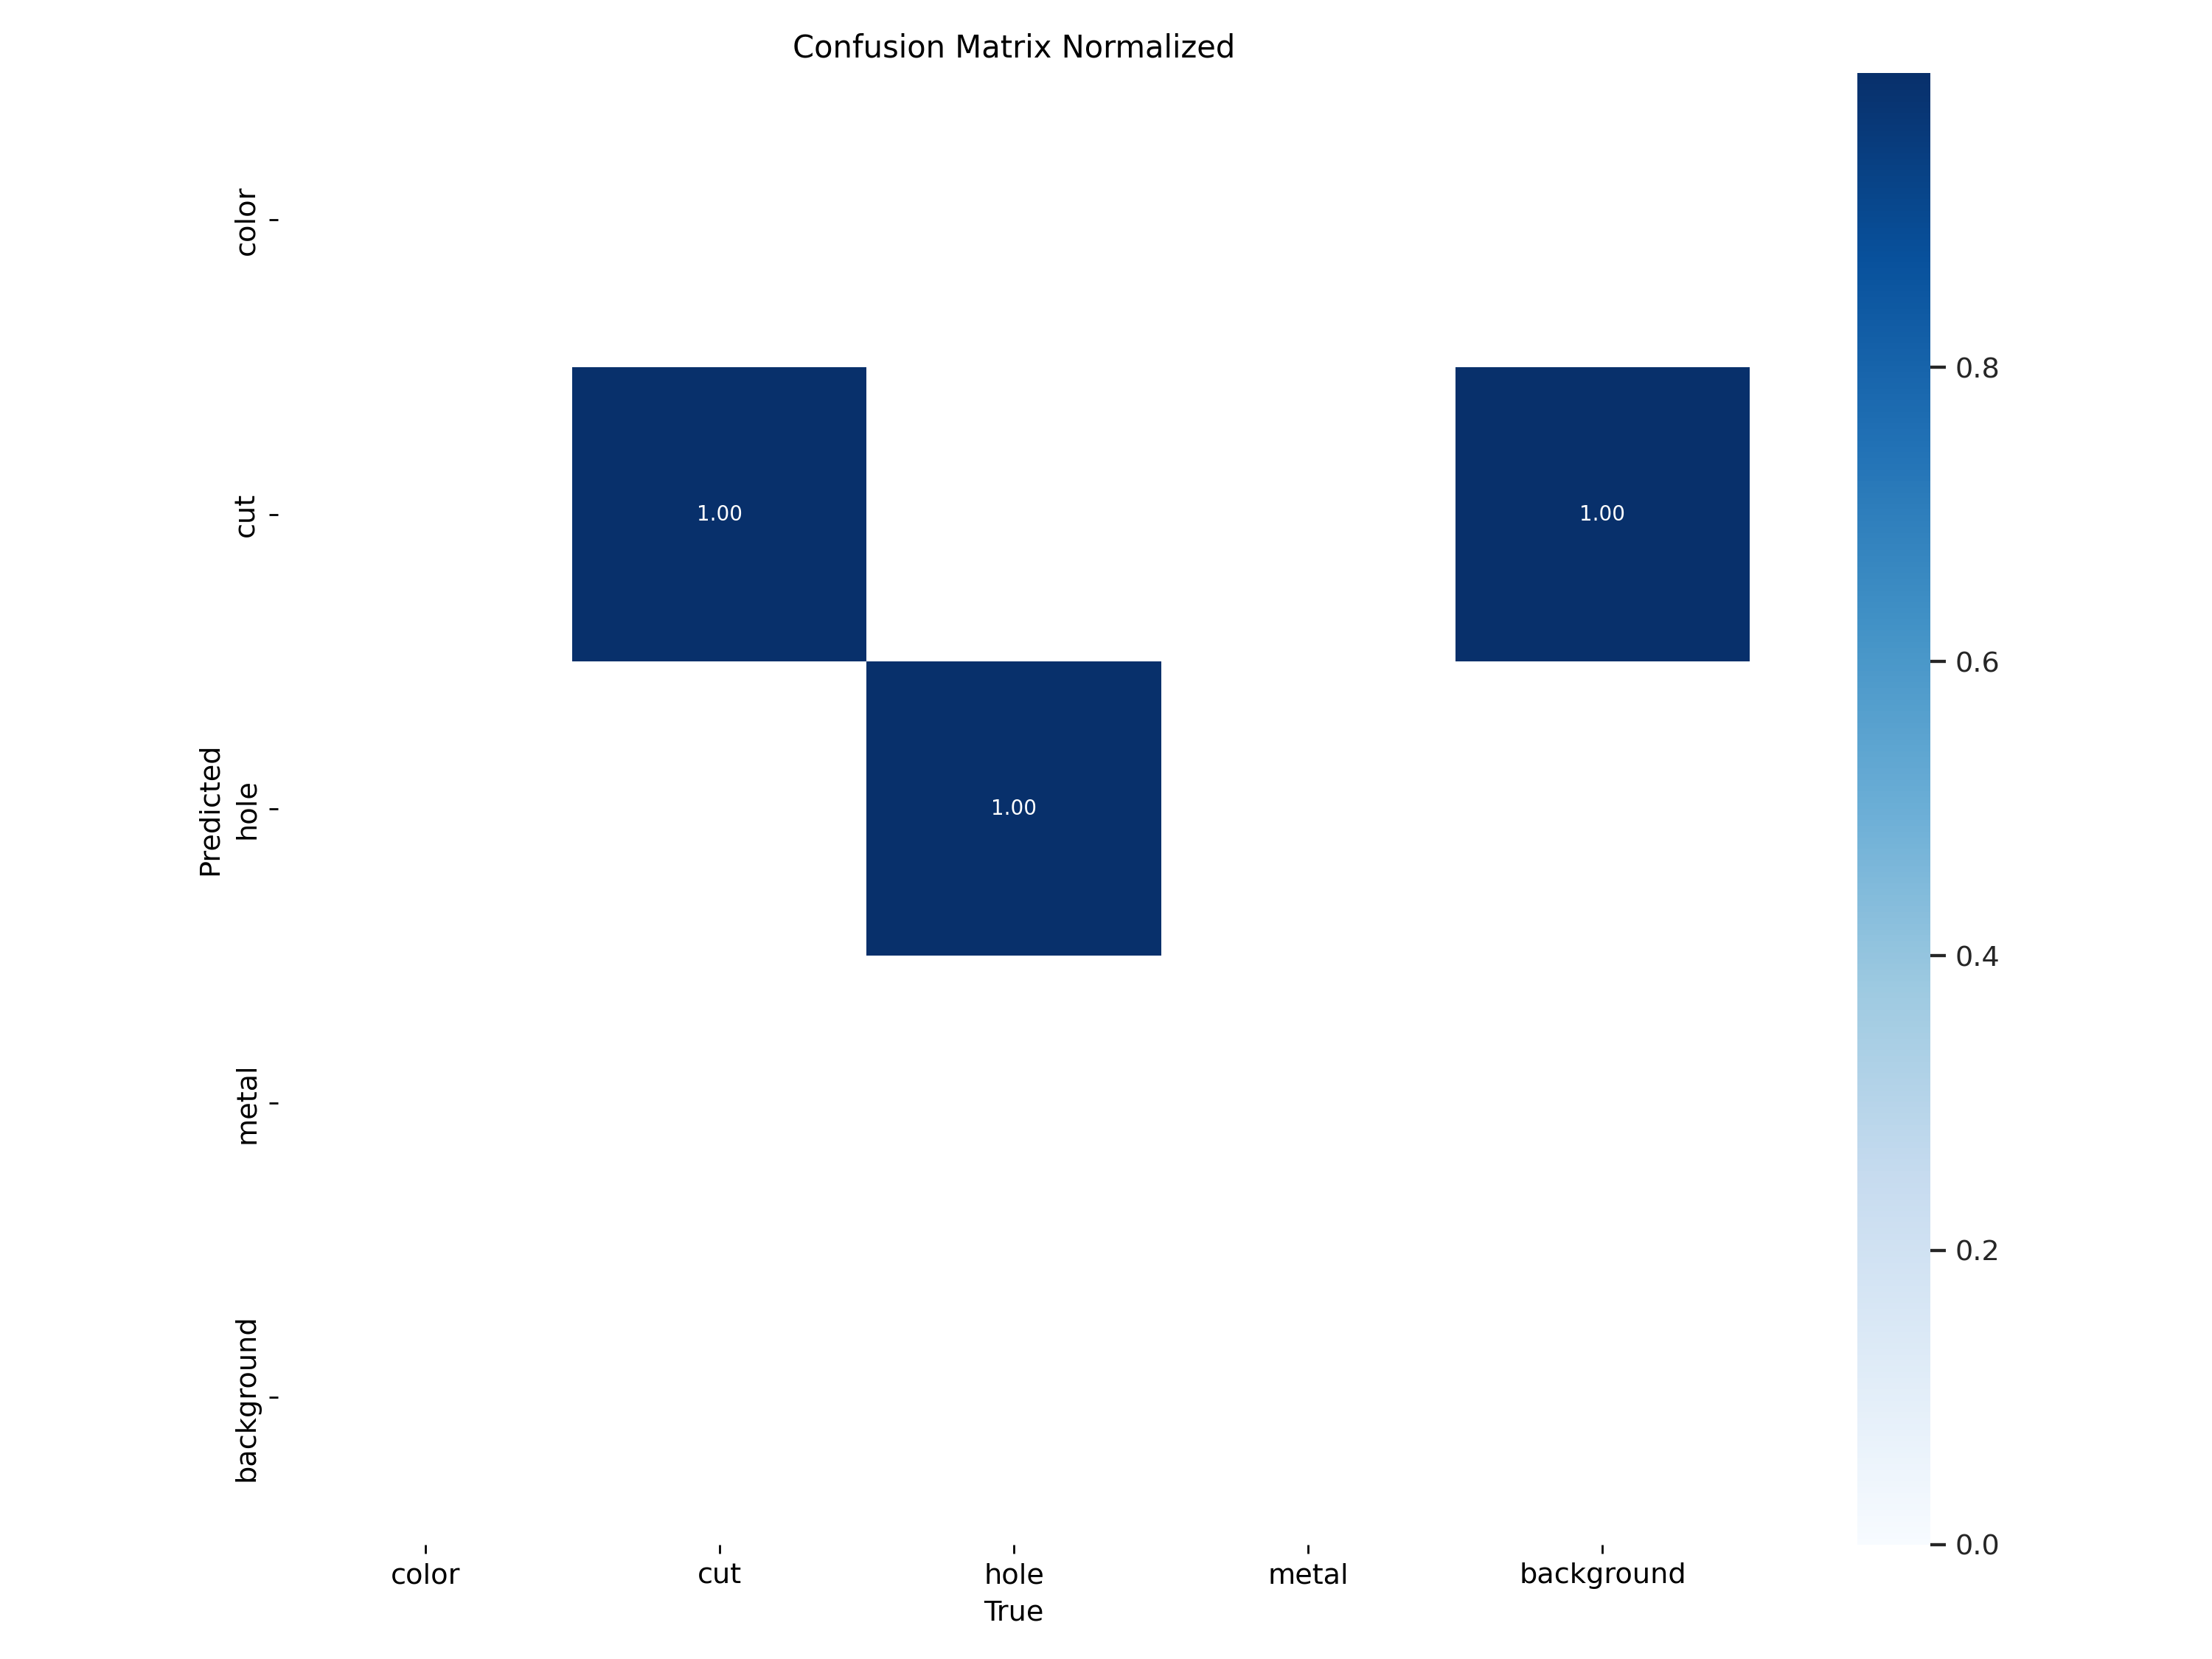

In [21]:
display(Image(filename="runs/detect/train/confusion_matrix_normalized.png", width=1000))

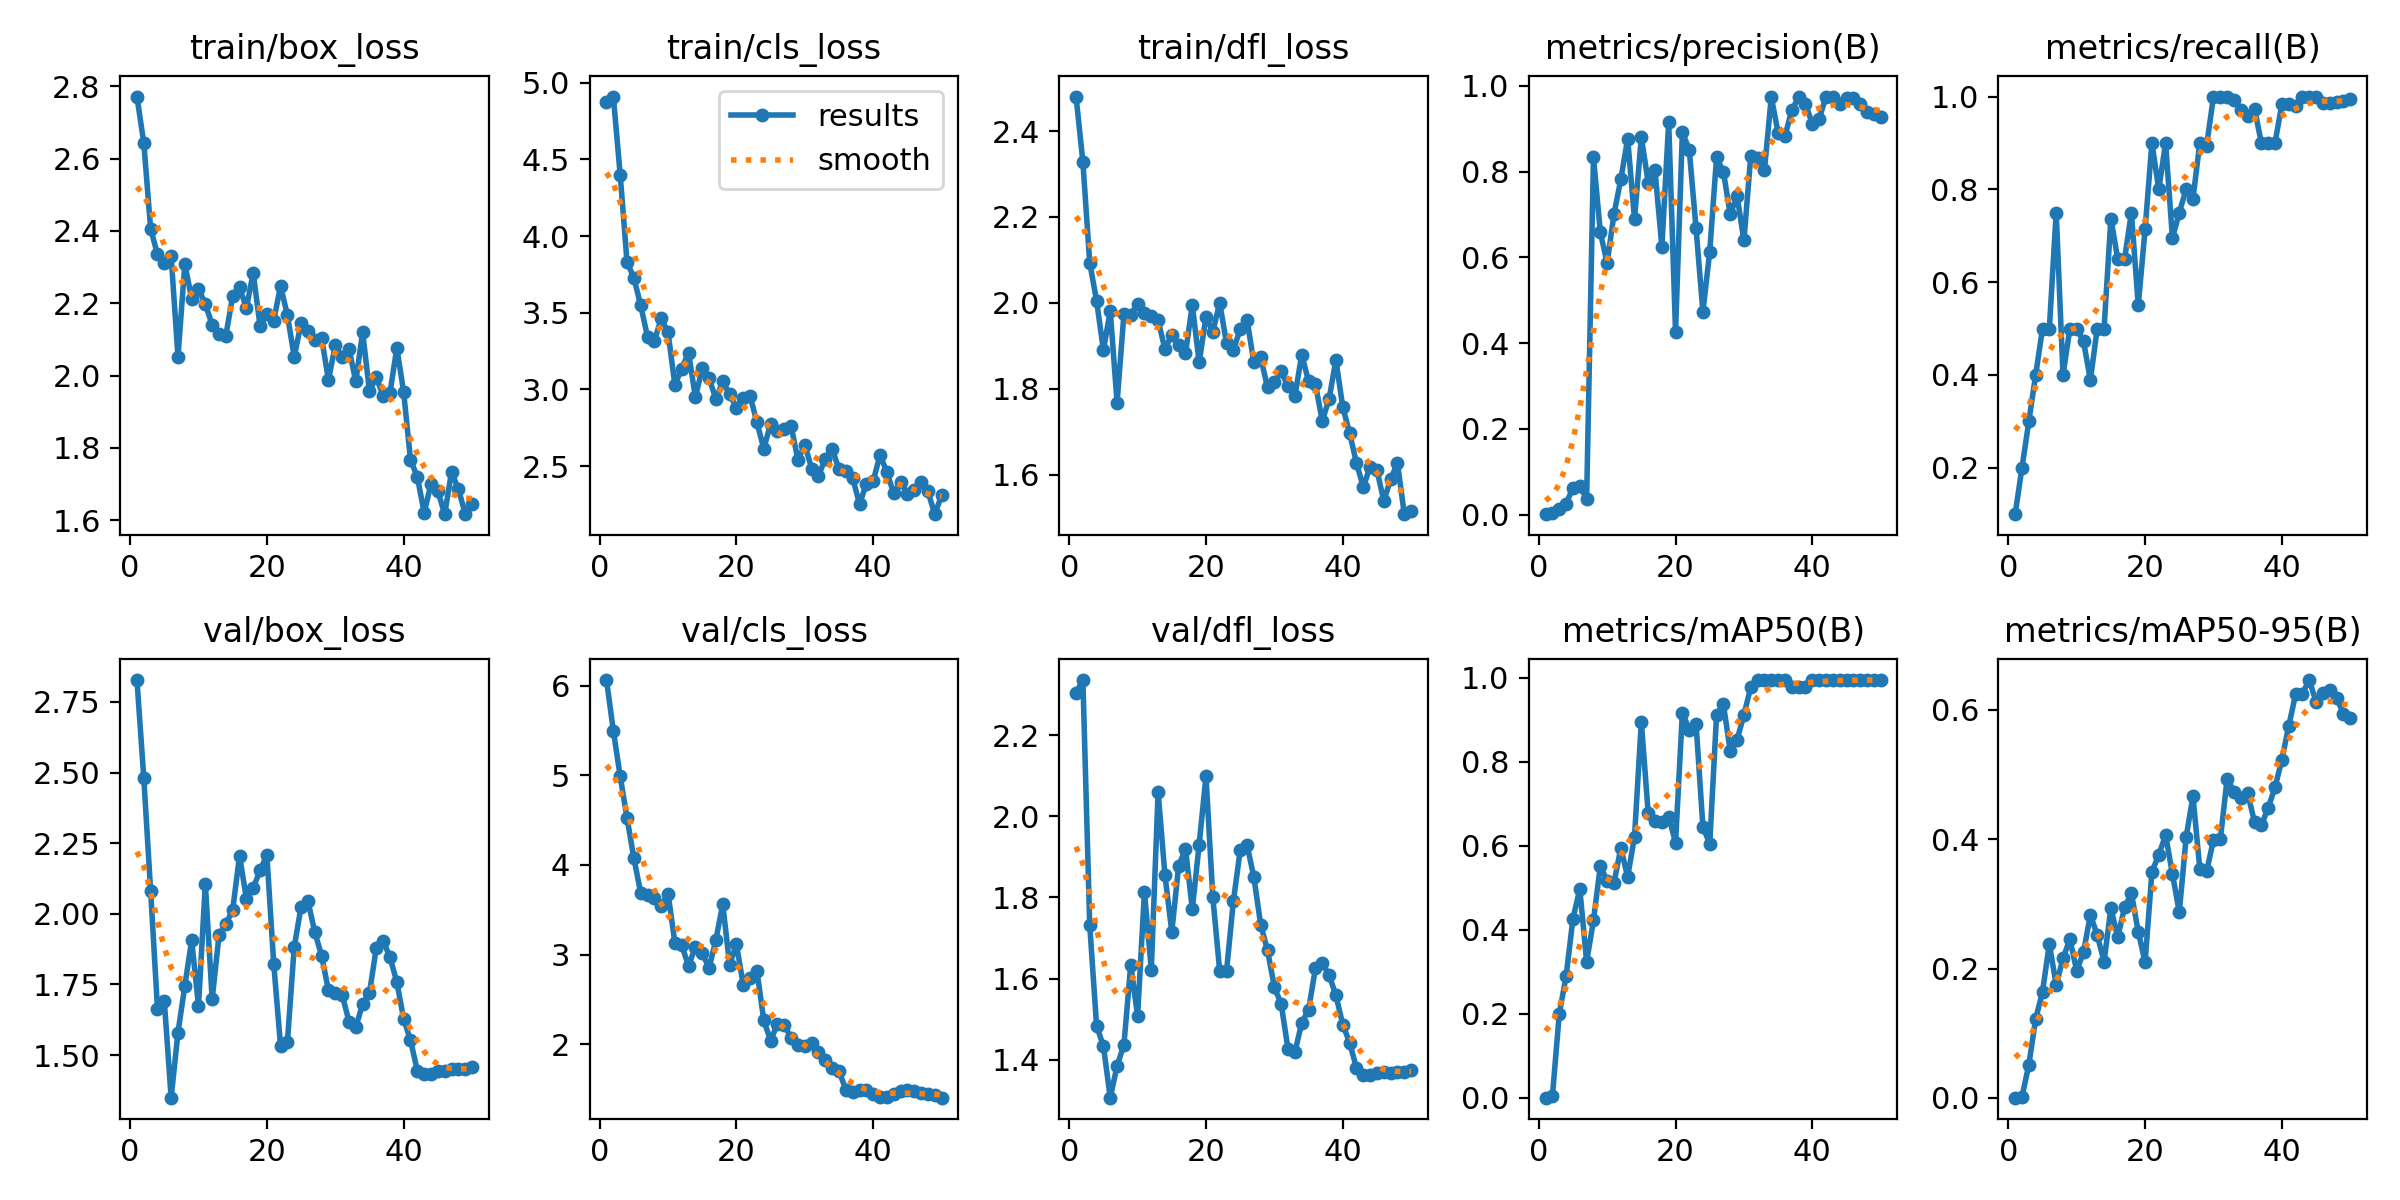

In [22]:
display(Image(filename="runs/detect/train/results.png", width=1000))

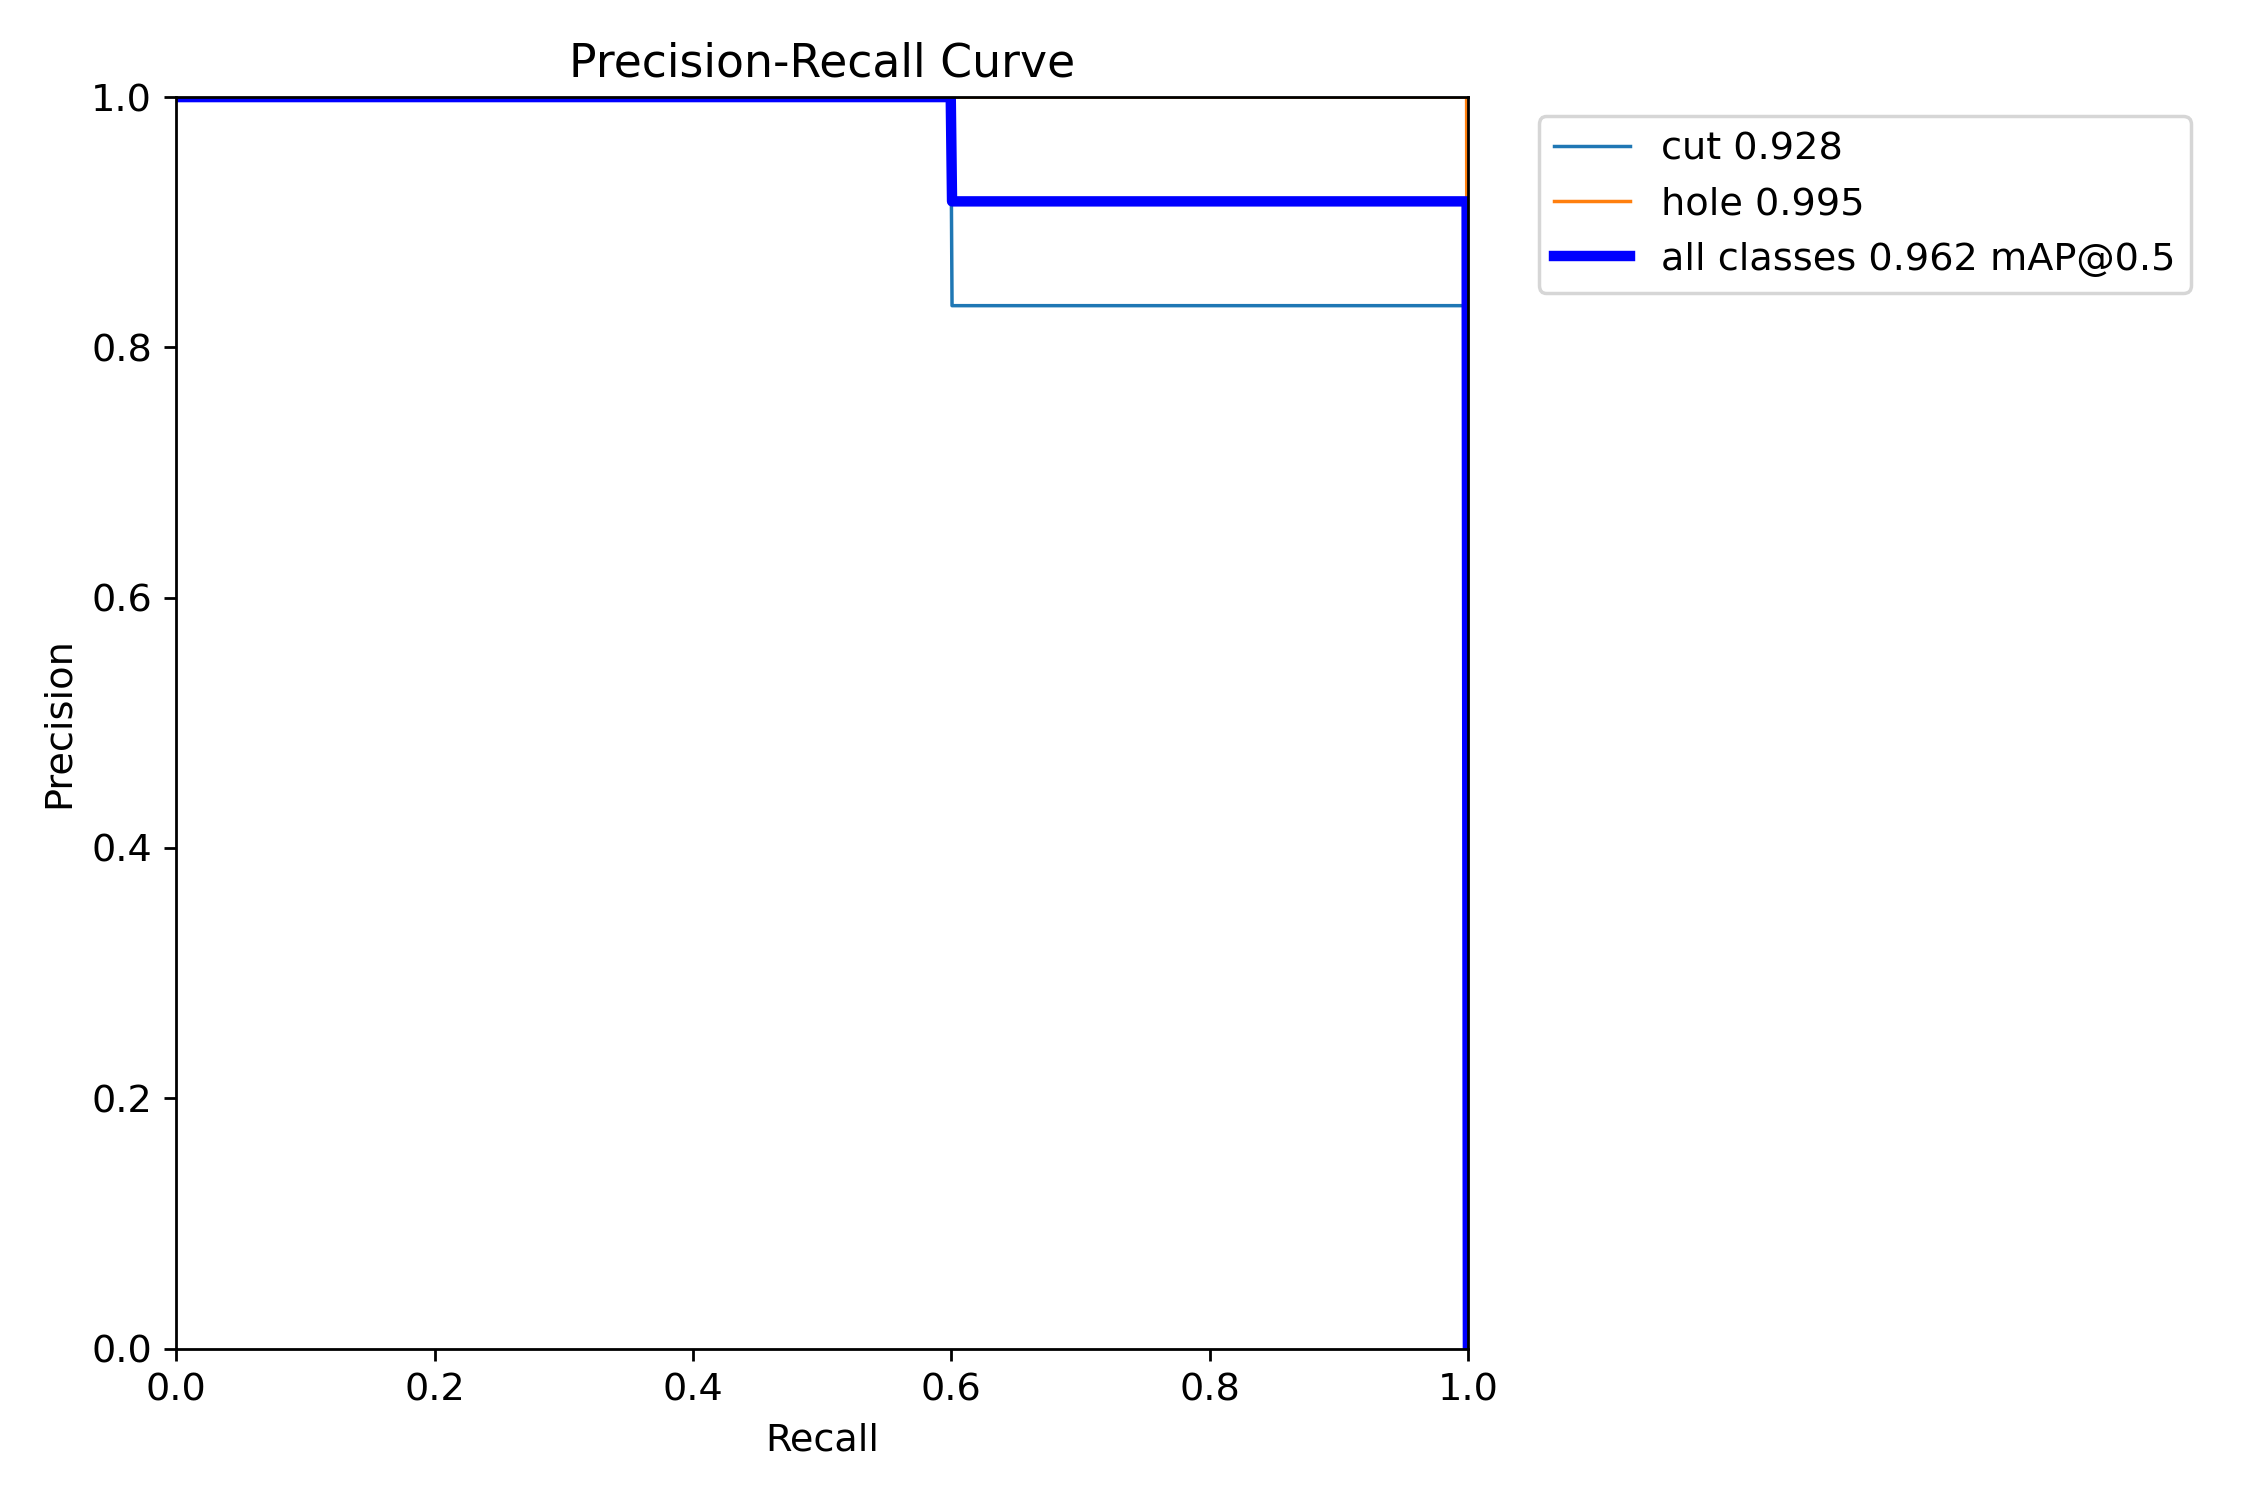

In [23]:
display(Image(filename="runs/detect/train/PR_curve.png", width=1000))

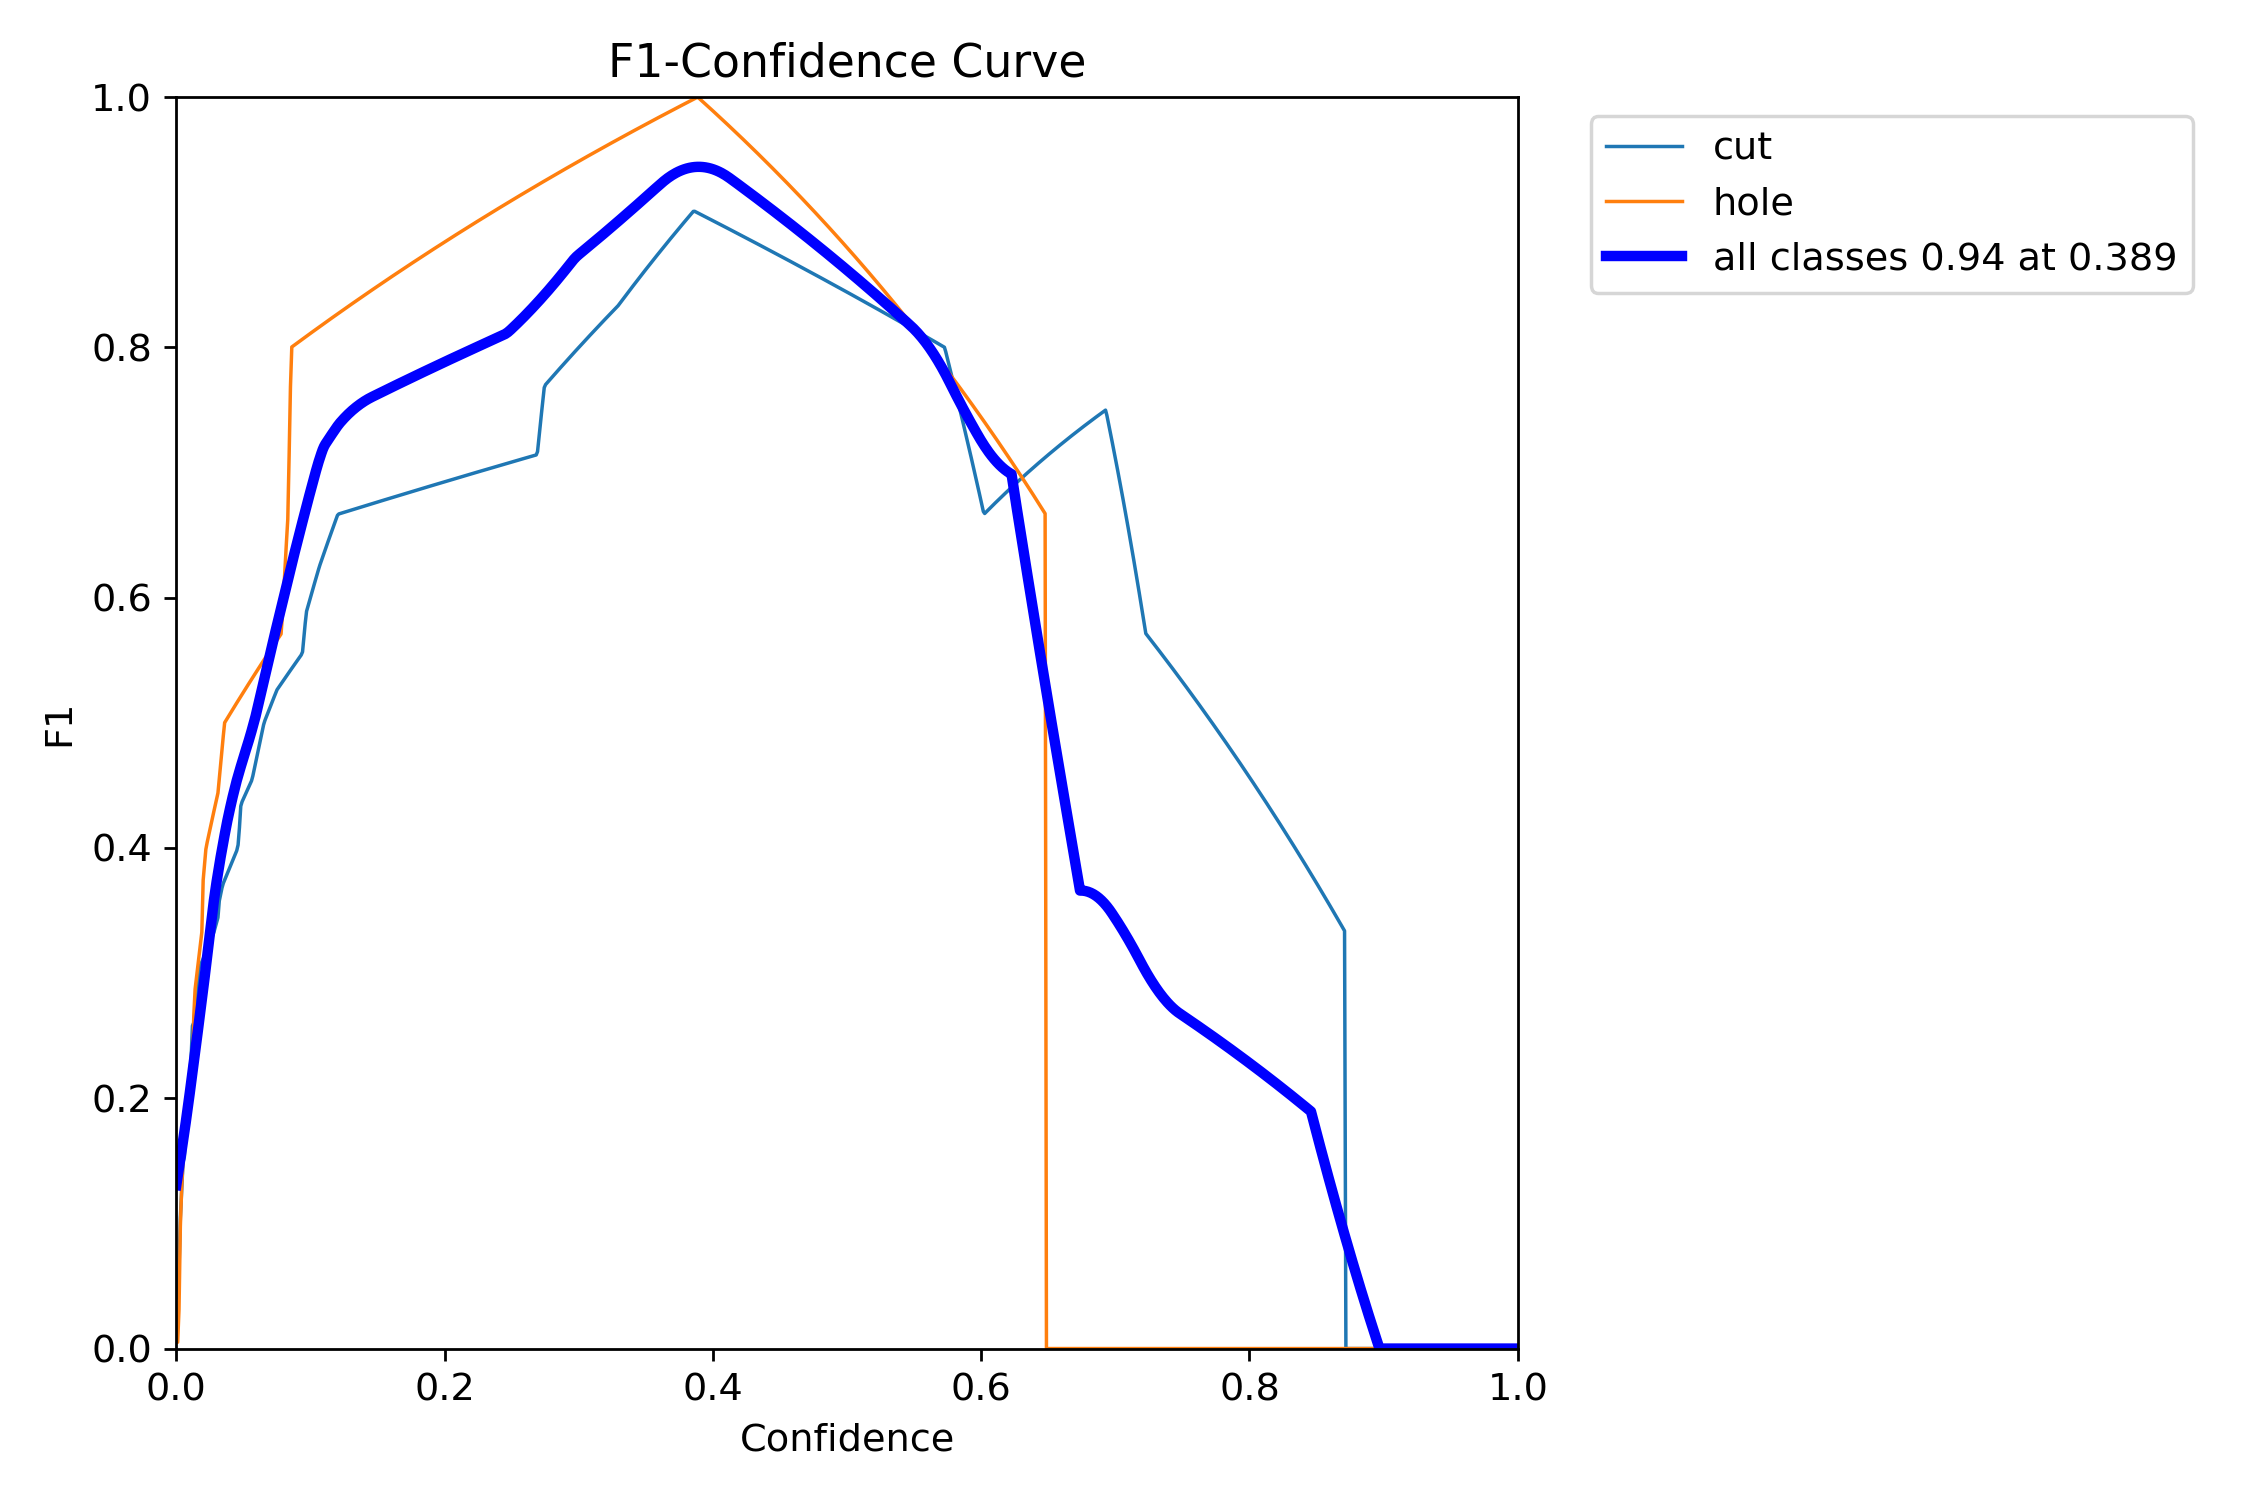

In [24]:
display(Image(filename="runs/detect/train/F1_curve.png", width=1000))

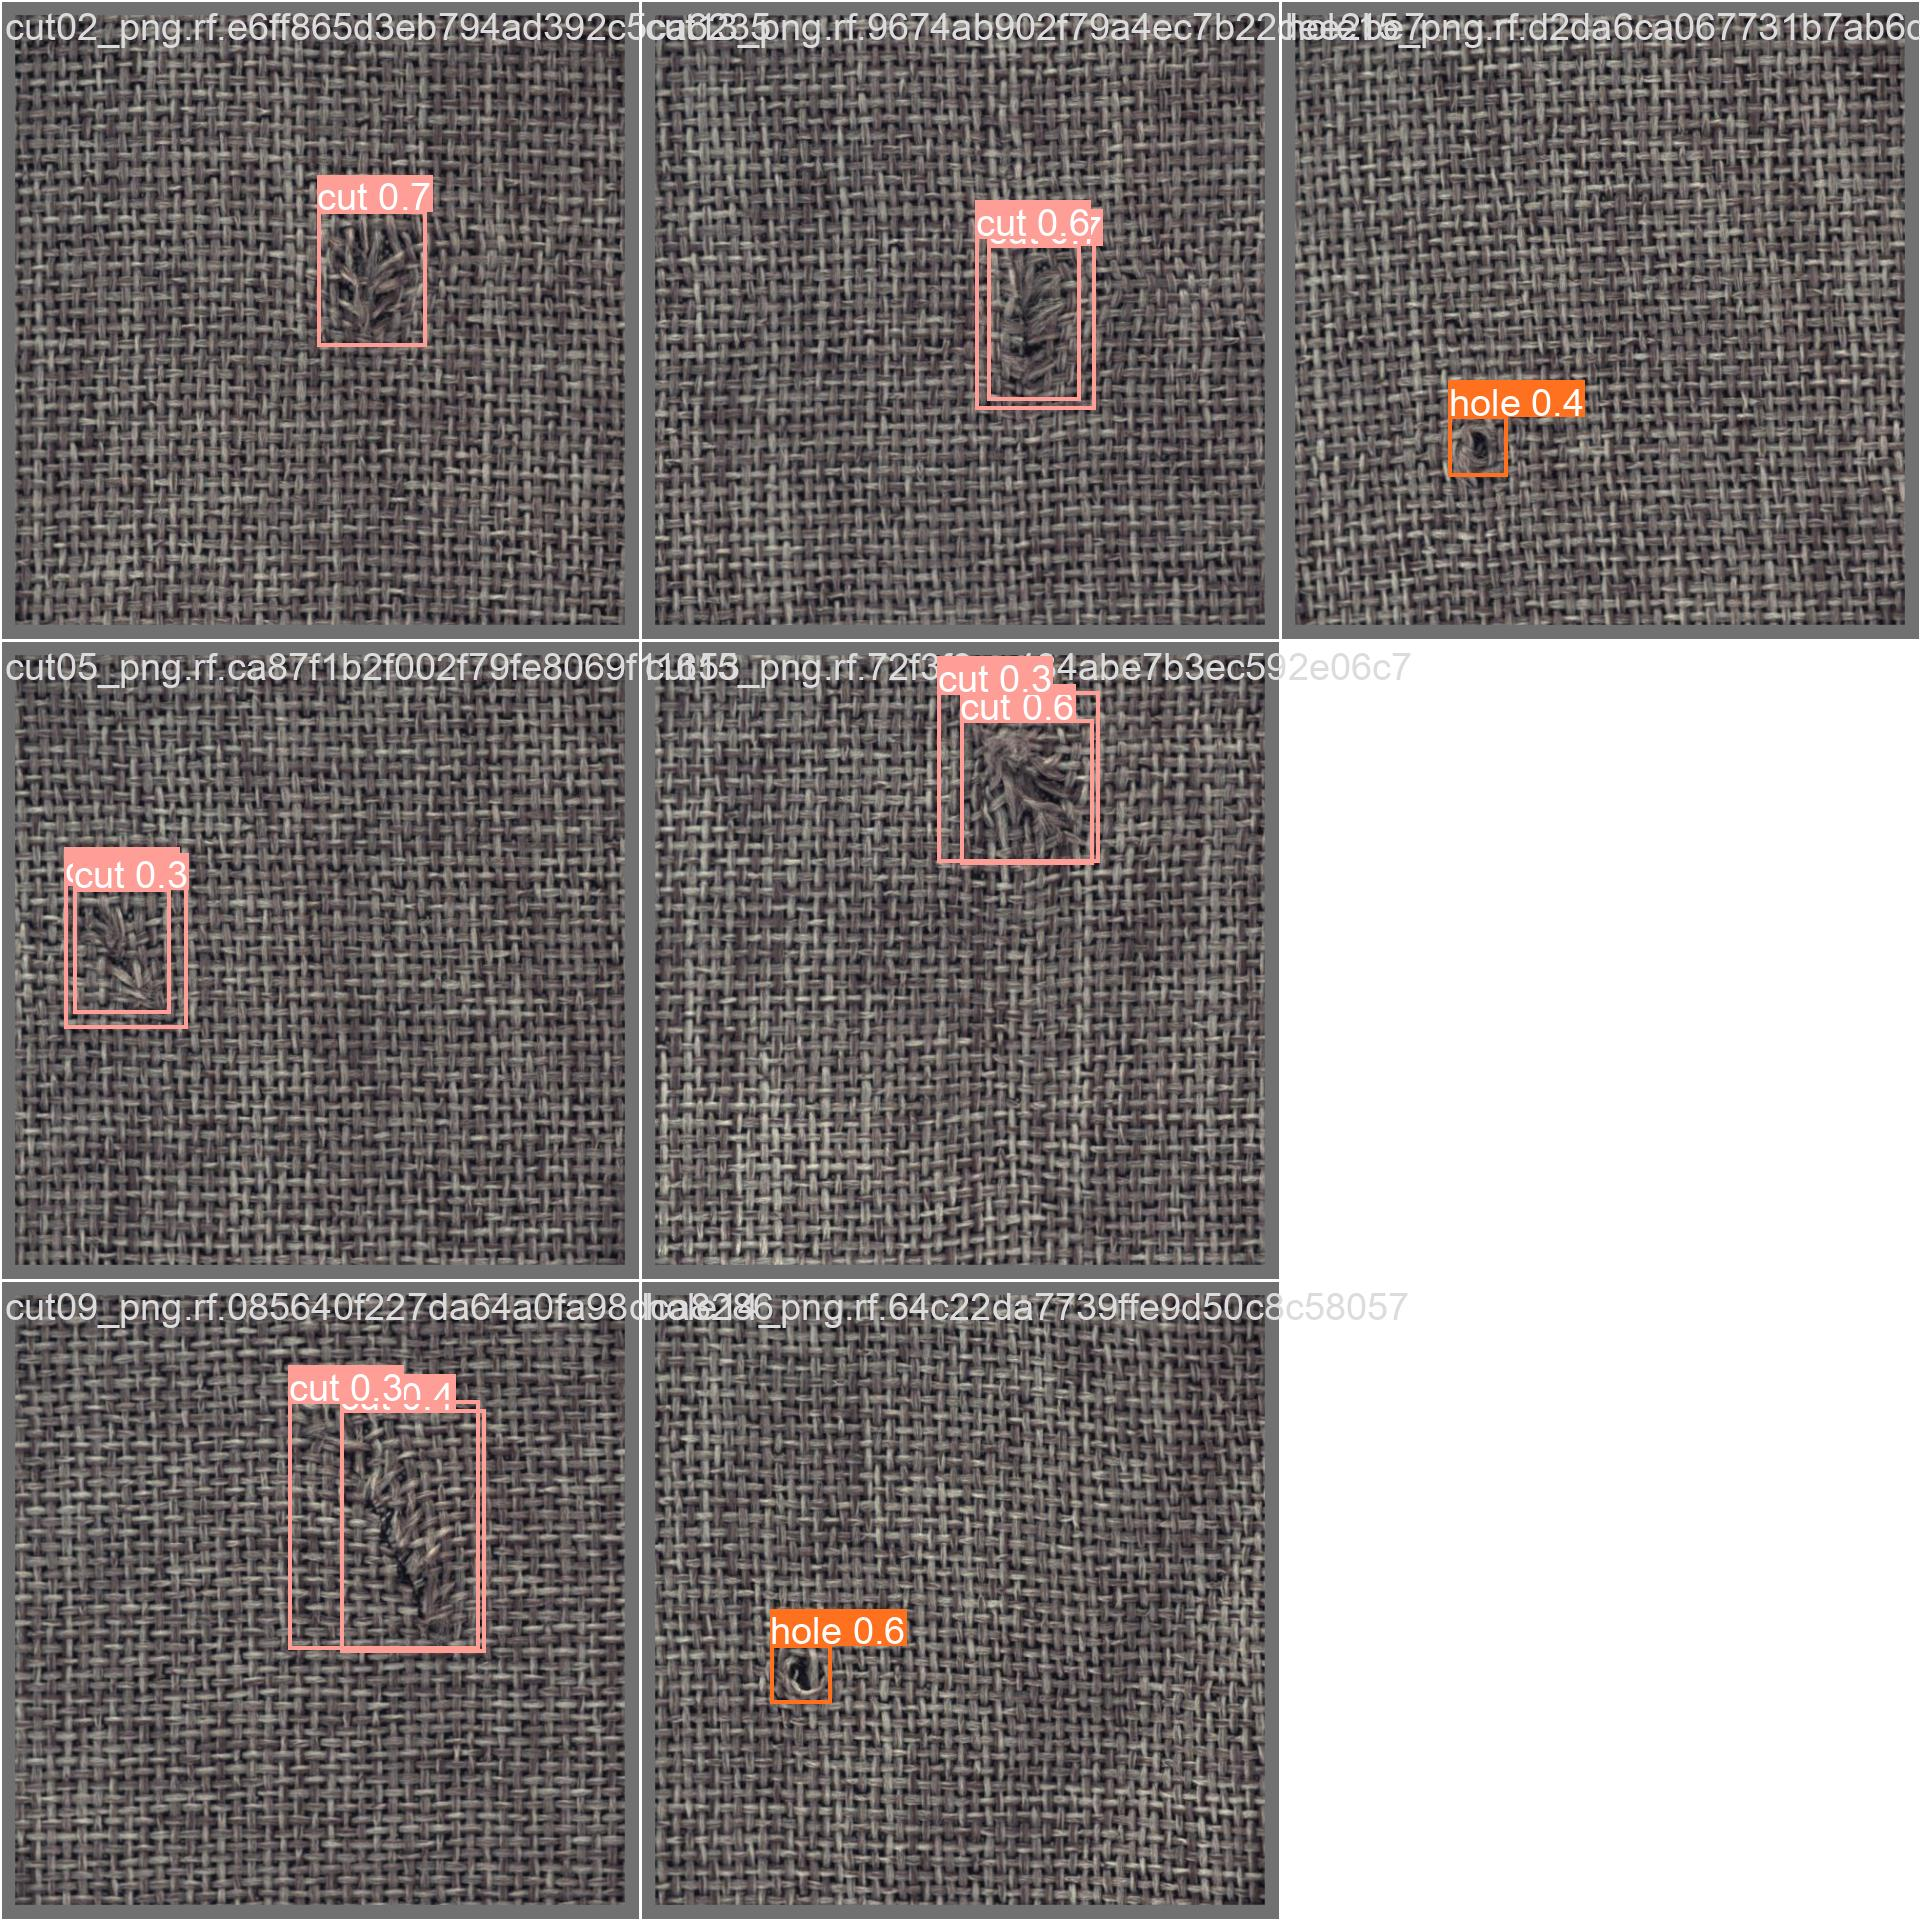

In [25]:
display(Image(filename="runs/detect/train/val_batch0_pred.jpg", width=1000))

**Inference**

**Evaluate the model on the test dataset.**

In [30]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml split=test

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/driver/MyDrive/fabric defect/test/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  5.55it/s]
                   all          1          1      0.921          1      0.995      0.597
                  hole          1          1      0.921          1      0.995      0.597
Speed: 0.4ms preprocess, 55.8ms inference, 0.0ms loss, 83.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Visualize the test output**

In [31]:
!ls 'runs/detect/val'

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg
F1_curve.png			 R_curve.png


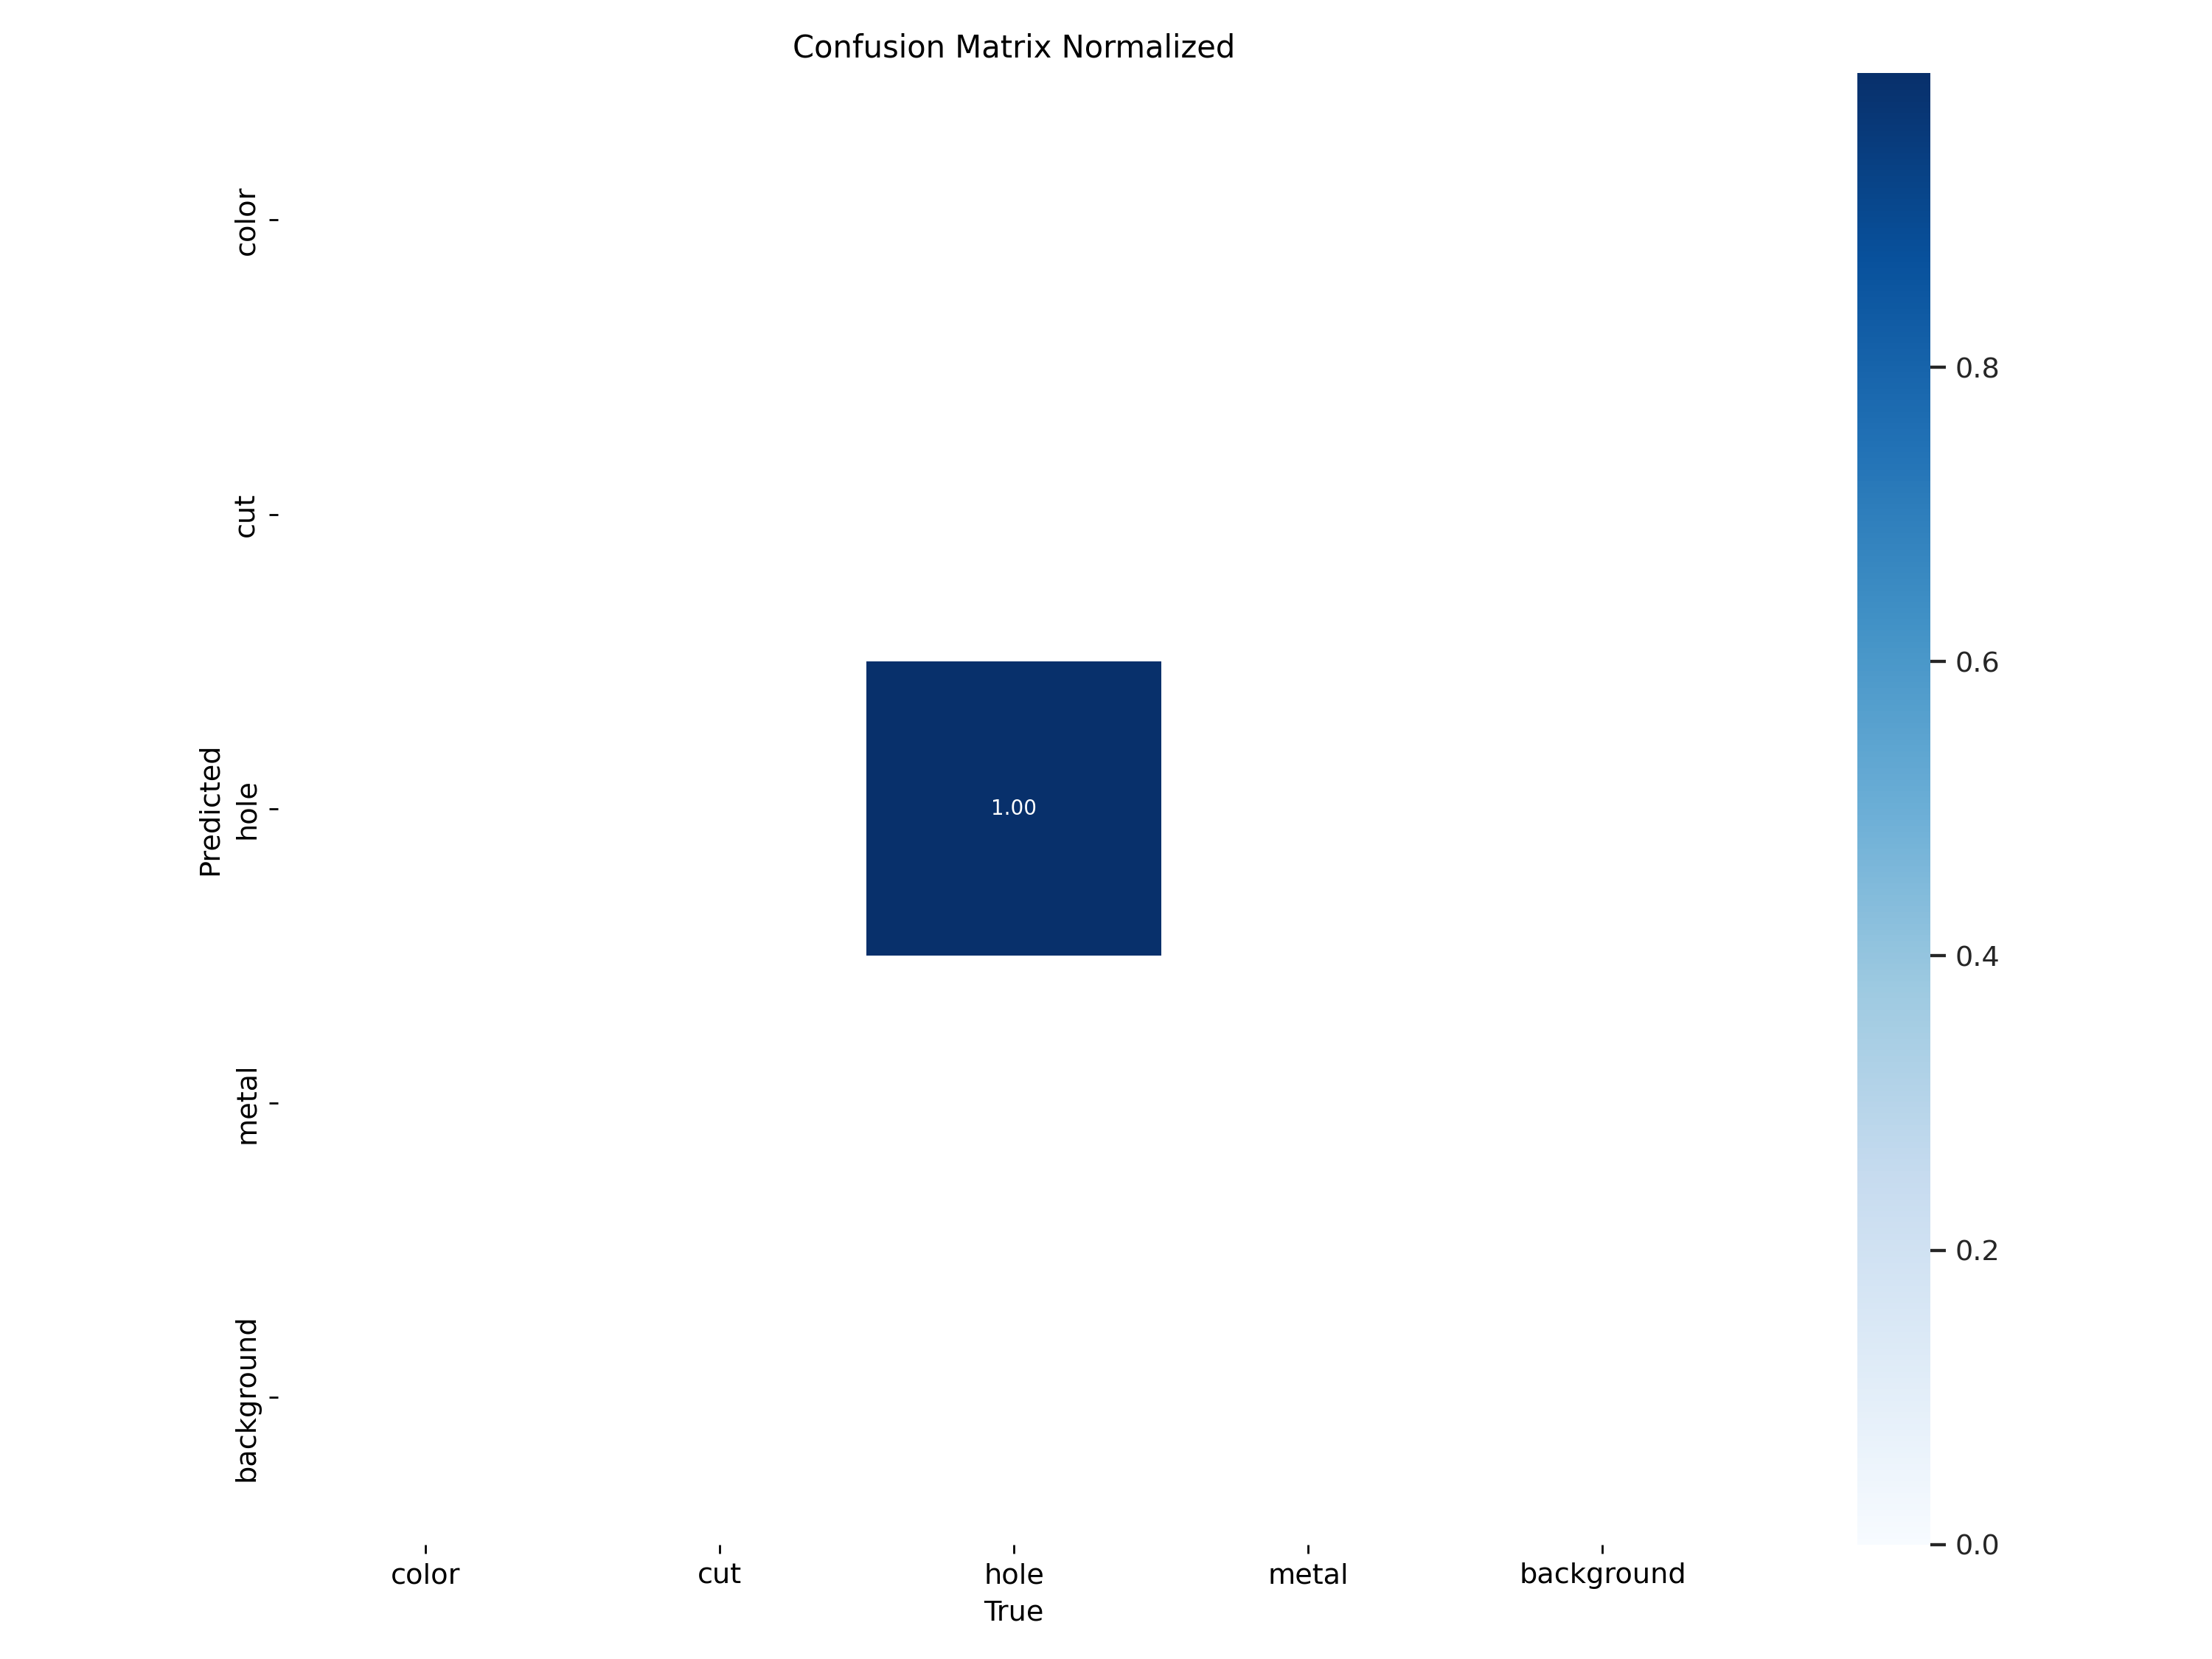

In [32]:
display(Image(filename="runs/detect/val/confusion_matrix_normalized.png", width=1000))

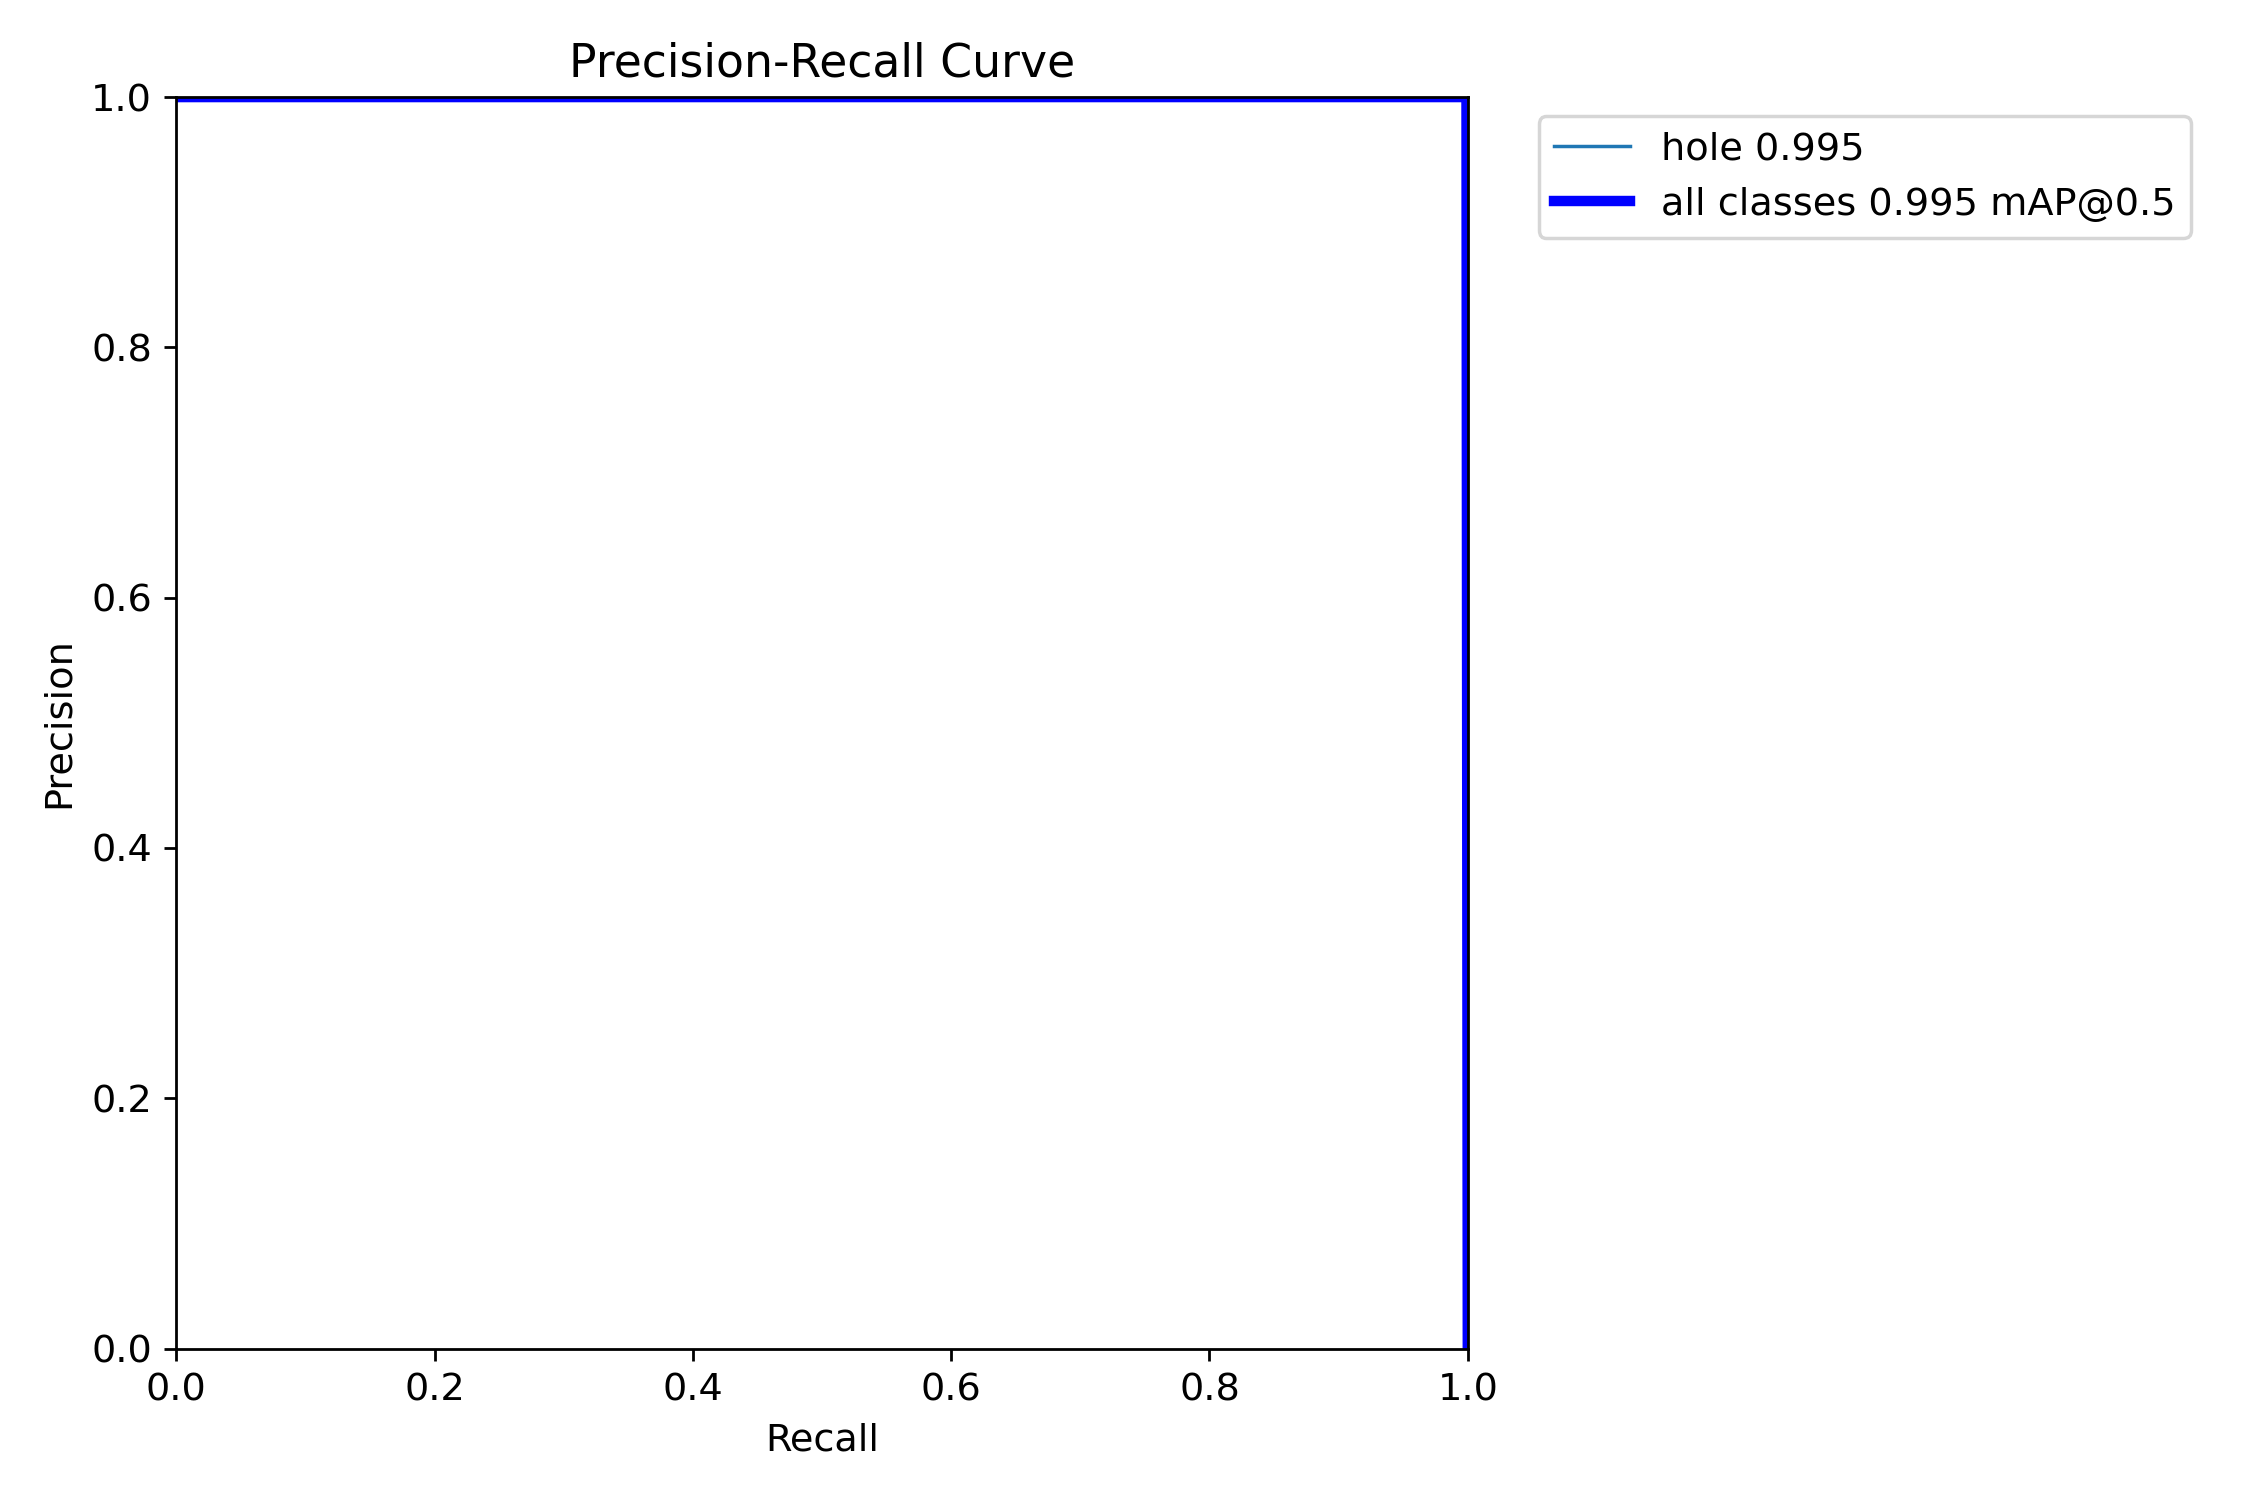

In [33]:
display(Image(filename="runs/detect/val/PR_curve.png", width=1000))

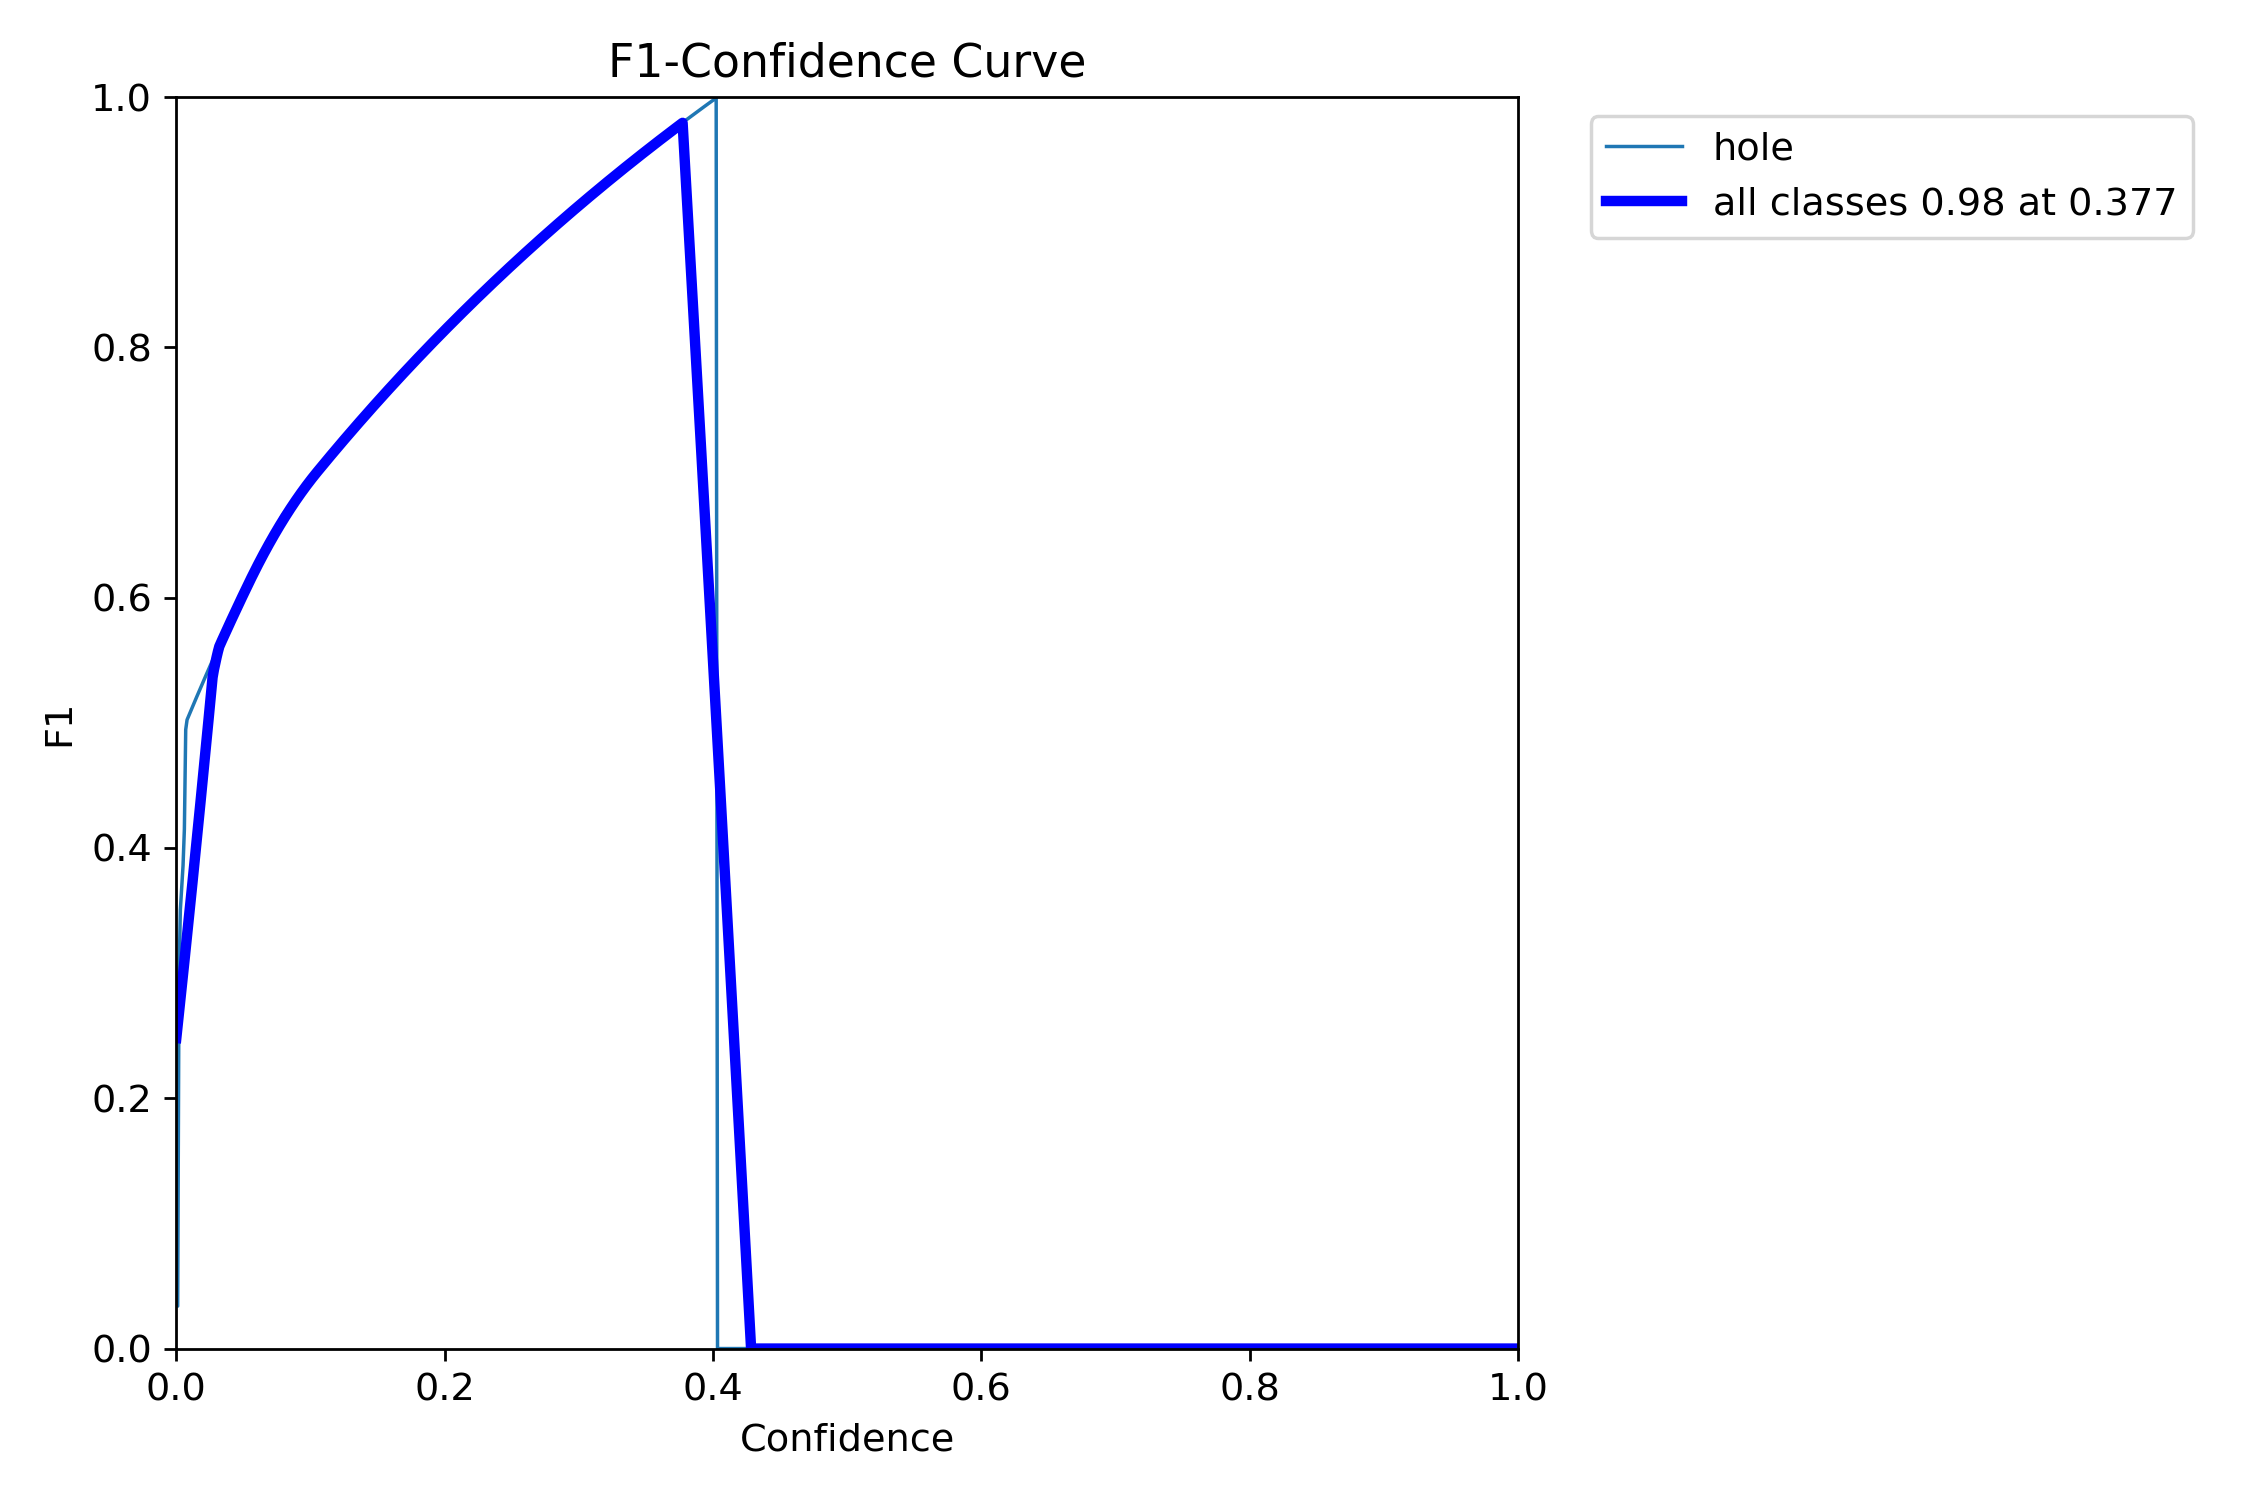

In [34]:
display(Image(filename="runs/detect/val/F1_curve.png", width=1000))

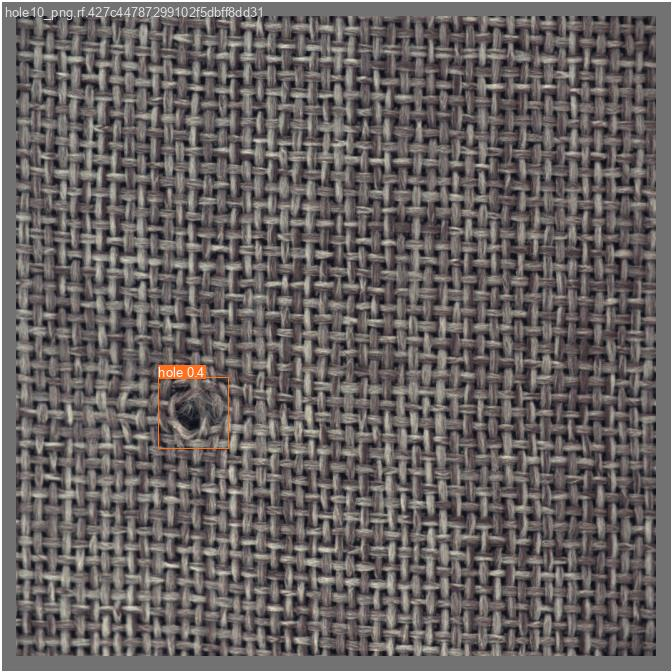

In [35]:
display(Image(filename="runs/detect/val/val_batch0_pred.jpg", width=1000))

**Inference**

In [39]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.35 source=data/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/driver/MyDrive/fabric defect/data/test/images/hole10_png.rf.427c44787299102f5dbff8dd316b6cae.jpg: 640x640 1 hole, 9.1ms
Speed: 2.4ms preprocess, 9.1ms inference, 99.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


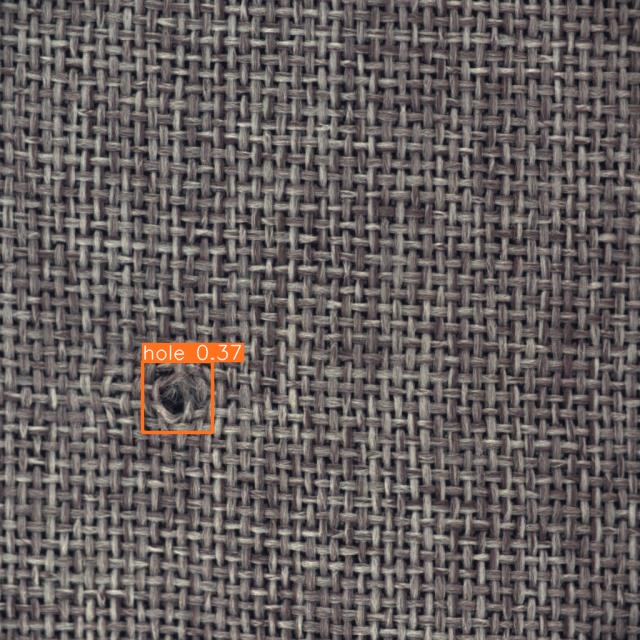

In [40]:
img_path = glob.glob(f'./runs/detect/predict/*')

for img in img_path:
  display(Image(filename=img, width=500))
  print('\n')